In [35]:
!pip install keras_tuner --upgrade

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
import keras_tuner as kt
from keras import Sequential
from keras.layers import Dense,Dropout,BatchNormalization

In [37]:
df = pd.read_csv('wine.csv')

In [38]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [39]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [43]:
df.quality.replace(df.quality.unique(), [i for i in range(df.quality.nunique())], inplace=True)

C:\Users\rahul_81y8h2r\AppData\Local\Temp\ipykernel_3524\4294194228.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.quality.replace(df.quality.unique(), [i for i in range(df.quality.nunique())], inplace=True)


In [44]:
X = df.drop(['quality'], axis = 1)
y = df['quality']

In [45]:
X.shape

(1599, 11)

In [46]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [47]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size = 0.30,random_state = 1)

In [56]:
def build_model(hp):
    
    model = keras.Sequential()
    
    # Hidden Layers
    for i in range(hp.Int('num_layers', 1, 12)):
        model.add(
            keras.layers.Dense(
                units = hp.Int('units', min_value=32, max_value=512, step=32), 
                activation = hp.Choice('activation', ['relu', 'tanh'])))
    
    # Dropout Layer  
    if hp.Boolean("dropout"):
        model.add(
            keras.layers.Dropout(rate=0.25))
    
    # Output Layer
    model.add(
        keras.layers.Dense(units=1, activation='sigmoid'))
    
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    return model

In [58]:
tuner = kt.RandomSearch(
    hypermodel = build_model,
    objective = 'val_accuracy',
    max_trials = 3,
    executions_per_trial = 3)

In [61]:
tuner.search(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Trial 3 Complete [00h 00m 54s]
val_accuracy: 0.5208333134651184

Best val_accuracy So Far: 0.6534722447395325
Total elapsed time: 00h 02m 17s


In [ ]:
model = tuner.best_model(num_models=1)[0]

In [ ]:
history = model.fit(X_train,y_train,epochs = 50,validation_data = (X_val,y_val))

Epoch 1/100


35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5290 - loss: 8.0737 - val_accuracy: 0.6250 - val_loss: 1.2125
Epoch 2/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5790 - loss: 3.4489 - val_accuracy: 0.5708 - val_loss: 1.2390
Epoch 3/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5794 - loss: 2.6723 - val_accuracy: 0.6125 - val_loss: 1.1720
Epoch 4/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5656 - loss: 2.2146 - val_accuracy: 0.5500 - val_loss: 1.6037
Epoch 5/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5824 - loss: 1.5558 - val_accuracy: 0.6229 - val_loss: 0.7884
Epoch 6/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5328 - loss: 1.2792 - val_accuracy: 0.5667 - val_loss: 0.7434
Epoch 7/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5979 - loss: 0.8673 - val_accuracy: 0.5896 - val_loss: 0.6923
Epoch 8/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5905 - loss: 0.7845 - val_accuracy: 0.6375 - val_loss: 0.6

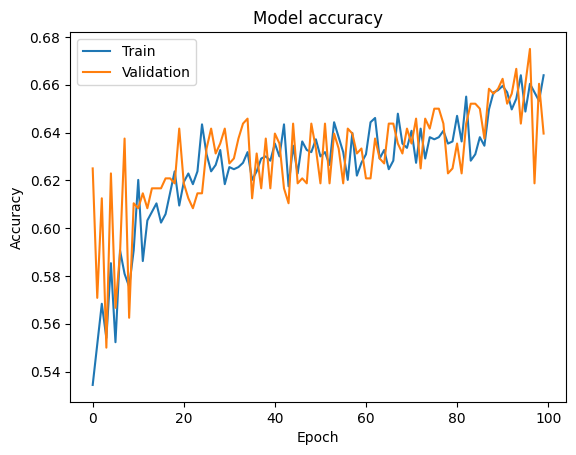

In [62]:
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()




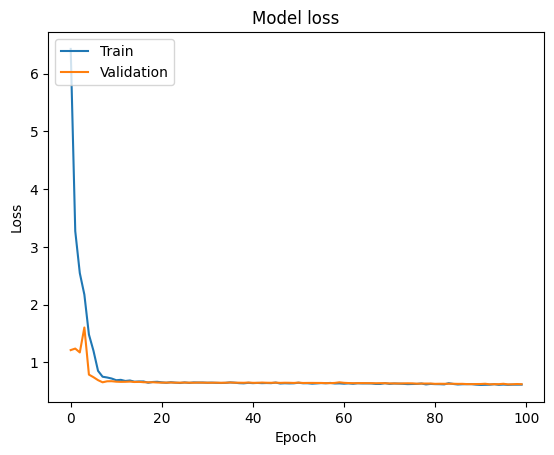

In [63]:
plt.plot(history.history['loss'])    
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()